<a href="https://colab.research.google.com/github/gromdimon/code/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
mix = pd.concat([train, test], axis=0)
mix

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
sex = mix.Sex.map({'male':1, 'female':0})
sex = sex.rename('sex')
train_new = pd.concat([mix, sex], axis=1)
train_new.drop(columns='Sex')

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex
0,1,0.0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1.0,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0.0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",NaN,0,0,A.5. 3236,8.0500,NaN,S,1
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,C,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1
416,1308,NaN,3,"Ware, Mr. Frederick",NaN,0,0,359309,8.0500,NaN,S,1


In [8]:
train_new = train_new.drop(columns=['Name', 'Ticket'])

In [9]:
train_new.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [10]:
train_f = pd.get_dummies(train_new.Embarked, drop_first=False)
train_f
train_final = pd.concat([train_new, train_f], axis=1)
final = train_final.drop(columns=['Sex', 'Cabin', 'Embarked'])

In [26]:
final.to_csv('fin.csv')
fin = pd.read_csv('fin.csv', index_col='PassengerId')
fin = fin.drop(columns='Unnamed: 0')

In [27]:
fin.isnull().sum()

Survived    418
Pclass        0
Age         263
SibSp         0
Parch         0
Fare          1
sex           0
C             0
Q             0
S             0
dtype: int64

In [38]:
fin.loc[fin.Fare.isnull()]

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,C,Q,S
PassengerId,,,,,,,,,,
1044,NaN,3,60.5,0,0,NaN,1,0,0,1


In [39]:
finla = fin.drop(1044)
finla.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1308 non-null   int64  
 2   Age       1045 non-null   float64
 3   SibSp     1308 non-null   int64  
 4   Parch     1308 non-null   int64  
 5   Fare      1308 non-null   float64
 6   sex       1308 non-null   int64  
 7   C         1308 non-null   int64  
 8   Q         1308 non-null   int64  
 9   S         1308 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 112.4 KB


In [46]:
finla_age = finla.Age.fillna(finla.Age.mean())
finla_age.rename('agge', inplace=True)

PassengerId
1       22.000000
2       38.000000
3       26.000000
4       35.000000
5       35.000000
          ...    
1305    29.851837
1306    39.000000
1307    38.500000
1308    29.851837
1309    29.851837
Name: agge, Length: 1308, dtype: float64

In [48]:
dat = pd.concat([finla, finla_age], axis=1)
dat.drop(columns='Age', inplace=True)
dat

,Survived,Pclass,SibSp,Parch,Fare,sex,C,Q,S,agge
PassengerId,,,,,,,,,,
1,0.0,3,1,0,7.2500,1,0,0,1,22.000000
2,1.0,1,1,0,71.2833,0,1,0,0,38.000000
3,1.0,3,0,0,7.9250,0,0,0,1,26.000000
4,1.0,1,1,0,53.1000,0,0,0,1,35.000000
5,0.0,3,0,0,8.0500,1,0,0,1,35.000000
...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,0,0,8.0500,1,0,0,1,29.851837
1306,NaN,1,0,0,108.9000,0,1,0,0,39.000000
1307,NaN,3,0,0,7.2500,1,0,0,1,38.500000


In [68]:
test_ = dat[891:]
test_

,Survived,Pclass,SibSp,Parch,Fare,sex,C,Q,S,agge
PassengerId,,,,,,,,,,
892,NaN,3,0,0,7.8292,1,0,1,0,34.500000
893,NaN,3,1,0,7.0000,0,0,0,1,47.000000
894,NaN,2,0,0,9.6875,1,0,1,0,62.000000
895,NaN,3,0,0,8.6625,1,0,0,1,27.000000
896,NaN,3,1,1,12.2875,0,0,0,1,22.000000
...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,0,0,8.0500,1,0,0,1,29.851837
1306,NaN,1,0,0,108.9000,0,1,0,0,39.000000
1307,NaN,3,0,0,7.2500,1,0,0,1,38.500000


In [53]:
train_ = dat[:891]
train_

,Survived,Pclass,SibSp,Parch,Fare,sex,C,Q,S,agge
PassengerId,,,,,,,,,,
1,0.0,3,1,0,7.2500,1,0,0,1,22.000000
2,1.0,1,1,0,71.2833,0,1,0,0,38.000000
3,1.0,3,0,0,7.9250,0,0,0,1,26.000000
4,1.0,1,1,0,53.1000,0,0,0,1,35.000000
5,0.0,3,0,0,8.0500,1,0,0,1,35.000000
...,...,...,...,...,...,...,...,...,...,...
887,0.0,2,0,0,13.0000,1,0,0,1,27.000000
888,1.0,1,0,0,30.0000,0,0,0,1,19.000000
889,0.0,3,1,2,23.4500,0,0,0,1,29.851837


In [54]:
train_.isnull().sum()

Survived    0
Pclass      0
SibSp       0
Parch       0
Fare        0
sex         0
C           0
Q           0
S           0
agge        0
dtype: int64

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
X = train_.drop(columns='Survived')
Y = train_['Survived']

In [56]:
print(X.shape, Y.shape)

(891, 9) (891,)


In [59]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [69]:
test_f = test_.drop(columns='Survived')

In [70]:
pred = model.predict(test_f)
pred

array([0.13      , 0.18      , 0.62      , 0.72      , 0.56      ,
       0.05916667, 0.31616162, 0.125     , 0.92      , 0.01      ,
       0.        , 0.08666667, 1.        , 0.3       , 1.        ,
       0.95      , 0.05666667, 0.7       , 0.65      , 0.19      ,
       0.45      , 0.746     , 1.        , 0.46      , 0.96      ,
       0.        , 1.        , 0.68      , 0.73266667, 0.25      ,
       0.        , 0.05      , 0.8       , 0.19      , 0.69483333,
       0.5       , 0.02      , 0.08      , 0.01      , 0.60866667,
       0.29      , 0.51016667, 0.135     , 1.        , 0.99      ,
       0.01      , 0.33733333, 0.11736106, 0.98      , 0.7       ,
       0.57      , 0.16      , 0.91      , 0.88      , 0.32      ,
       0.07      , 0.        , 0.00333333, 0.        , 1.        ,
       0.05333333, 0.4325    , 0.02307692, 0.87      , 0.71      ,
       0.95      , 0.87      , 0.03      , 0.1       , 0.96      ,
       0.77255051, 0.        , 0.27      , 0.34      , 1.     

In [71]:
answer = pred.round()
answer.shape

(417,)

In [86]:
ans = pd.read_csv('gender_submission.csv', index_col='PassengerId')
ans = ans.drop(1044)

In [95]:
an = ans['Survived']
an

PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Survived, Length: 417, dtype: int64

In [121]:
errors = abs(answer - an)
print(round(np.mean(errors), 2))

0.16


In [122]:
mape = 100 * (errors / an)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


In [135]:

fd = pd.DataFrame(data=an)
fd

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [125]:
df = pd.DataFrame(data=answer)
df

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
412,0.0
413,1.0
414,0.0
415,0.0


In [194]:
tr = 0
fl = 0
m=0
col=[]
for i in fd.Survived:
  if i == answer[m]:
    tr += 1
    col.append(1)
  else:
    fl += 1
    col.append(0)
  m +=1
print(tr, fl)

349 68


In [152]:
test_

,Survived,Pclass,SibSp,Parch,Fare,sex,C,Q,S,agge
PassengerId,,,,,,,,,,
892,NaN,3,0,0,7.8292,1,0,1,0,34.500000
893,NaN,3,1,0,7.0000,0,0,0,1,47.000000
894,NaN,2,0,0,9.6875,1,0,1,0,62.000000
895,NaN,3,0,0,8.6625,1,0,0,1,27.000000
896,NaN,3,1,1,12.2875,0,0,0,1,22.000000
...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,0,0,8.0500,1,0,0,1,29.851837
1306,NaN,1,0,0,108.9000,0,1,0,0,39.000000
1307,NaN,3,0,0,7.2500,1,0,0,1,38.500000


In [225]:
co = np.array(col)
c = pd.DataFrame(data=col, columns=['w'])
c

,w
0,1
1,0
2,0
3,0
4,1
...,...
412,1
413,1
414,1
415,1


In [226]:
a=np.arange(892,1309)
aa = pd.DataFrame(a, columns=['t'])
aa

,t
0,892
1,893
2,894
3,895
4,896
...,...
412,1304
413,1305
414,1306
415,1307


In [227]:
s = pd.DataFrame(data=c)
ss = pd.concat([s, aa], axis=1)
ss.set_index('t', inplace=True)

In [228]:
ss

,w
t,
892,1
893,0
894,0
895,0
896,1
...,...
1304,1
1305,1
1306,1


In [229]:
show = pd.concat([test_, ss], axis=1)
show.drop(1309, inplace=True)
show.drop(columns='Survived', inplace=True)
show = show.dropna()

In [230]:
show.describe()

,Pclass,SibSp,Parch,Fare,sex,C,Q,S,agge,w
count,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000,416.000000
mean,2.262019,0.447115,0.391827,35.659085,0.634615,0.242788,0.110577,0.646635,30.113957,0.836538
std,0.842315,0.898240,0.983150,55.971095,0.482118,0.429285,0.313985,0.478591,12.578160,0.370231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000
25%,1.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,23.000000,1.000000
50%,3.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,29.851837,1.000000
75%,3.000000,1.000000,0.000000,31.500000,1.000000,0.000000,0.000000,1.000000,35.250000,1.000000
max,3.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,76.000000,1.000000


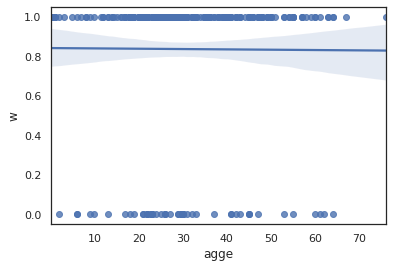

In [231]:
sns.regplot(x=show['agge'], y=show['w'])